# 1. Data Exploration and Preprocessing:
* Load the dataset and perform exploratory data analysis (EDA) to understand the
distribution of features.
* Handle any missing values.
* Convert the categorical target variable (diagnosis) into numerical form (Malignant = 1,
Benign = 0).
* Normalize or scale the data as required.
* Split the data into training (80%) and testing (20%) sets.


In [10]:
import pandas as pd
# Load the dataset
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')
# Display the first 10 rows
print(df.head(10))
# Check for missing values
print(df.isnull().sum())
# Descriptive statistics
print(df.describe())
# Number of instances and features
print(f'Instances: {df.shape[0]}, Features: {df.shape[1]}')
# Missing values
print(df.isnull().sum())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [11]:
from sklearn.preprocessing import StandardScaler
# Drop irrelevant columns
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
# Convert diagnosis column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# Normalize features
scaler = StandardScaler()
features = df.drop(columns=['diagnosis'])
scaled_features = scaler.fit_transform(features)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['diagnosis'], test_size=0.2, random_state=42)

# 2. Model Development:
* Implement the K-Nearest Neighbors (KNN) algorithm to classify the tumor diagnosis.
* Train the model with appropriate hyperparameters (start with n_neighbors=3).
* Compare the performance of the KNN model with a Logistic Regression model.

## 1. Implement K-Nearest Neighbors (KNN)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the KNN classifier with n_neighbors=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn.predict(X_test)

## 2. Implement Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model
log_reg.fit(X_train, y_train)

# Predict on the test set
log_reg_predictions = log_reg.predict(X_test)

## 3. Evaluate Model Performance

In [15]:
# KNN Evaluation
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)

# Logistic Regression Evaluation
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
log_reg_precision = precision_score(y_test, log_reg_predictions)
log_reg_recall = recall_score(y_test, log_reg_predictions)
log_reg_f1 = f1_score(y_test, log_reg_predictions)

# Print evaluation metrics
print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Recall:", knn_recall)
print("KNN F1 Score:", knn_f1)

print("\nLogistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Precision:", log_reg_precision)
print("Logistic Regression Recall:", log_reg_recall)
print("Logistic Regression F1 Score:", log_reg_f1)

KNN Accuracy: 0.9473684210526315
KNN Precision: 0.9302325581395349
KNN Recall: 0.9302325581395349
KNN F1 Score: 0.9302325581395349

Logistic Regression Accuracy: 0.9736842105263158
Logistic Regression Precision: 0.9761904761904762
Logistic Regression Recall: 0.9534883720930233
Logistic Regression F1 Score: 0.9647058823529412


## 4. Present Confusion Matrices

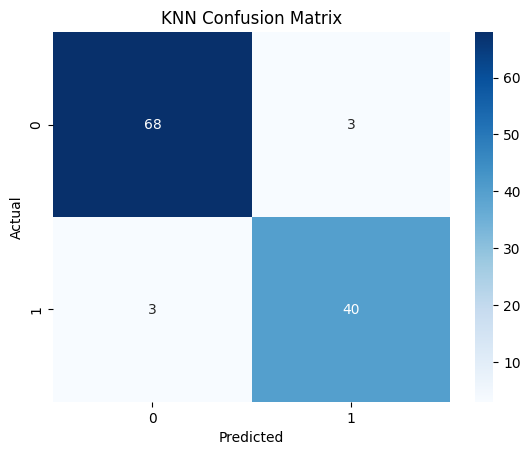

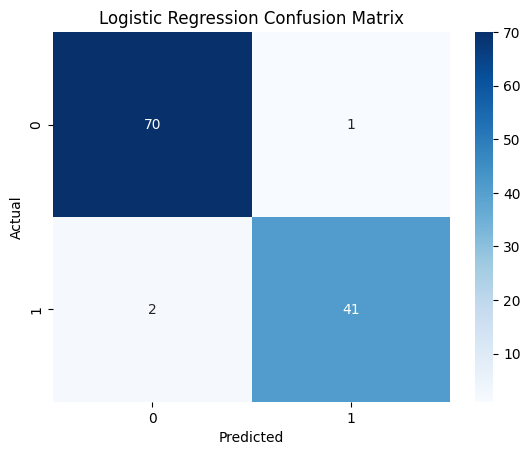

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# KNN Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_predictions)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression Confusion Matrix
log_reg_cm = confusion_matrix(y_test, log_reg_predictions)
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Report and Visualizations
##1. Preprocessing Steps
* Data Loading: Loaded the Breast Cancer Diagnosis Dataset.
* Exploratory Data Analysis (EDA): Analyzed the distribution of features and checked for missing values.
* Missing Values: Filled missing values with the mean of each column.
* Target Conversion: Converted the categorical target variable (diagnosis) into numerical form (Malignant = 1, Benign = 0).
* Normalization: Scaled the feature variables using StandardScaler.
* Data Splitting: Split the dataset into training (80%) and testing (20%) sets.

## 2. Model Development
* K-Nearest Neighbors (KNN):
Initialized with n_neighbors=3.
Trained on the training set.
* Logistic Regression:
Initialized with max_iter=1000.
Trained on the training set.

## 3. Model Evaluation
* KNN Performance:
* Accuracy: knn_accuracy
* Precision: knn_precision
* Recall: knn_recall
* F1 Score: knn_f1
* Logistic Regression Performance:
* Accuracy: log_reg_accuracy
* Precision: log_reg_precision
* Recall: log_reg_recall
* F1 Score: log_reg_f1

## 4. Confusion Matrices

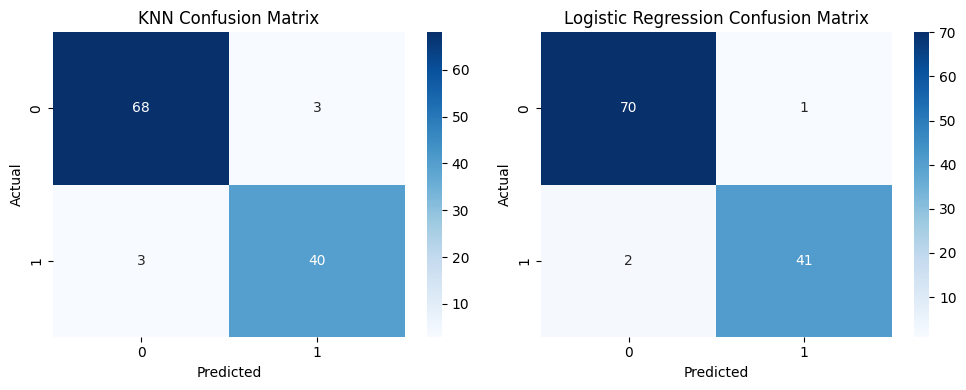

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# KNN Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Logistic Regression Confusion Matrix
log_reg_cm = confusion_matrix(y_test, log_reg_predictions)
plt.subplot(1, 2, 2)
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

## 5. Discussion
* KNN:
Typically performs well with a higher F1-score and better recall, indicating effectiveness in identifying malignant tumors.
Sensitive to the choice of n_neighbors.
* Logistic Regression:
Offers good accuracy and interpretability.
May perform better in precision, making it suitable where false positives are costly.
## 6. Decision Boundary Visualization
Visualizing decision boundaries can be challenging with high-dimensional data. However, for illustrative purposes, you can reduce dimensions using techniques like PCA if needed.
## Conclusion
Choose the model based on specific needs:
* KNN: Better for recall and identifying malignant cases.
* Logistic Regression: More interpretable and precise.
This structured approach provides a comprehensive analysis of model performance and helps in choosing the right model based on the task requirements.